# Kernel SVM

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
print(X_train)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

In [6]:
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


In [7]:
print(X_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [8]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
print(X_train)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

In [11]:
print(X_test)

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]
 [-0.80480212 -0.59677555]
 [-1.00286662 -0.42281668]
 [-0.11157634 -0.42281668]
 [ 0.08648817  0.21503249]
 [-1.79512465  0.47597078]
 [-0.60673761  1.37475825]
 [-0.11157634  0.21503249]
 [-1.89415691  0.44697764]
 [ 1.67100423  1.75166912]
 [-0.30964085 -1.37959044]
 [-0.30964085 -0.65476184]
 [ 0.8787462   2.15757314]
 [ 0.28455268 -0.53878926]
 [ 0.8787462   1.02684052]
 [-1.49802789 -1.20563157]
 [ 1.07681071  2.07059371]
 [-1.00286662  0.50496393]
 [-0.90383437  0.30201192]
 [-0.11157634 -0.21986468]
 [-0.60673761  0.47597078]
 [-1.6960924   0.53395707]
 [-0.11157634  0.27301877]
 [ 1.86906873 -0.27785096]
 [-0.11157634 -0.48080297]
 [-1.39899564 -0.33583725]
 [-1.99318916 -0.50979612]
 [-1.59706014  0.33100506]
 

## Training the Kernel SVM model on the Training set

In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Predicting a new result

In [13]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [14]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

## Visualising the Training set results 
會跑很久 請三思

C:\Users\sunny_weng\AppData\Local\Temp\ipykernel_45128\2540769460.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


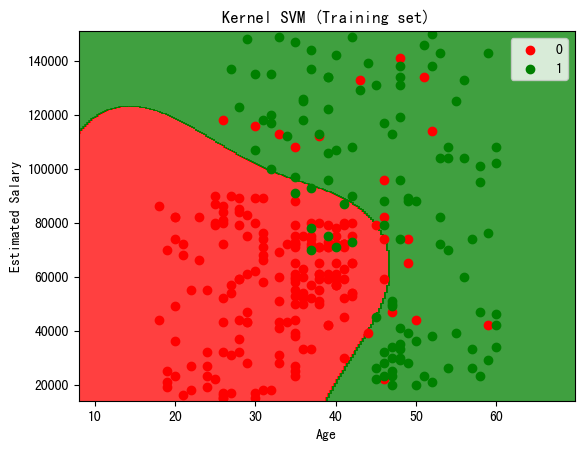

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results
會跑很久 請三思

C:\Users\sunny_weng\AppData\Local\Temp\ipykernel_45128\3257738180.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


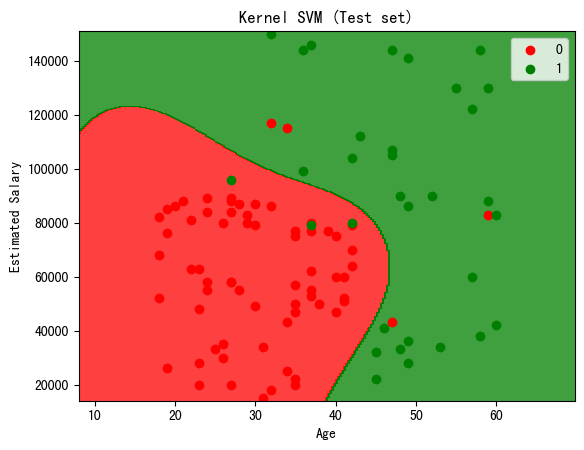

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## SVM 中的可調參數

[sklearn SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

- cost
- epsilon (SVR)
- kernel
- gamma





## C (cost)

一開始的SVM，是要尋找一個能夠完美將「所有」資料分成兩邊，具有最大margin的超平面，這又被稱為“hard-margin SVM”。

但由於hard-margin SVM，追求要將資料完美分好，因此很容易有overfitting的風險。於是1995年，Vapnik等人提出了“soft-margin SVM”，讓SVM能容許一些被分錯的資料存在。

在soft-margin SVM的損失函數(loss function)中，這個大C的存在，就是容錯項。

藉由C，我們能給予那些被分錯的資料懲罰值，控制support vectors(用來決定超平面的那些資料點)的影響力。


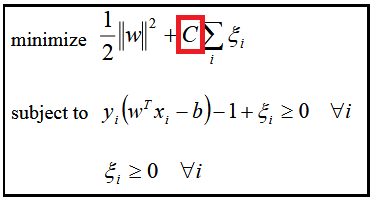


- C越大，代表容錯越小，越少support vectors，越接近hard-margin SVM的概念，卻容易overfitting

- C越小，代表容錯越大，越多support vectors，可以追求更大的margin


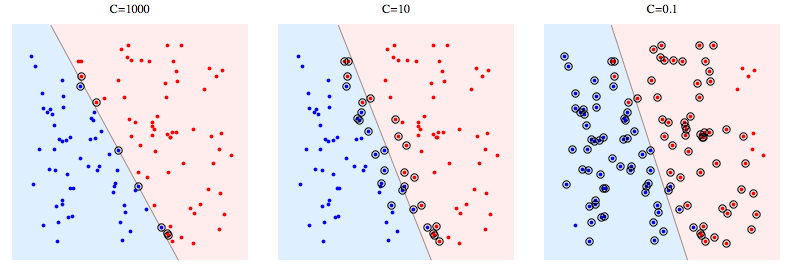

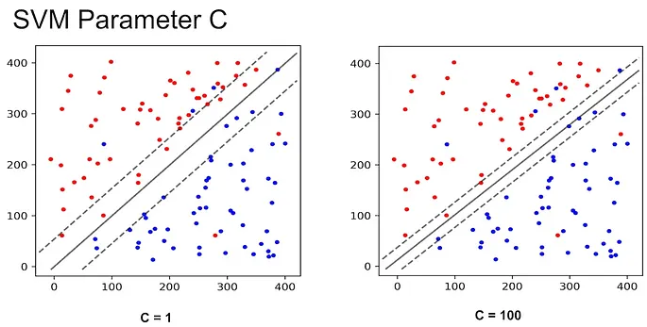


當C=1000時，support vectors的點幾乎都發生在線上面，很接近hard-margin SVM的概念。

當C越來越小，隨著support vectors的點越來越多，表示margin的範圍越來越大。

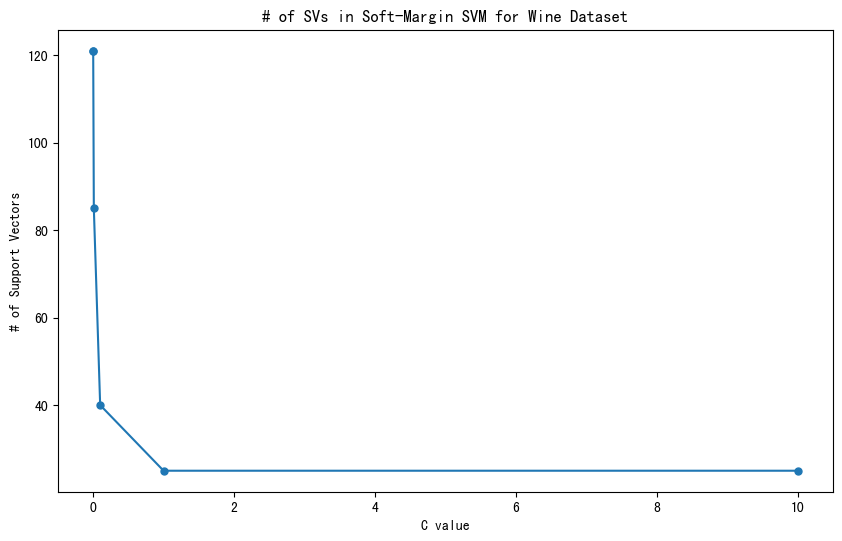

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 加載數據
data = load_wine()
X = data.data
y = data.target

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 初始化儲存支持向量數量的列表
num_SV = []
Cs = [0.0001, 0.001 , 0.01, 0.1, 1, 10]  # C值從1到101，確保包括100

# 計算不同C值對應的支持向量數量
for C in Cs:
    svm_model = SVC(C=C, kernel='linear')
    svm_model.fit(X_train, y_train)
    num_SV.append(svm_model.n_support_.sum())  # 獲取支持向量的總數

# 繪圖
plt.figure(figsize=(10, 6))
plt.plot(Cs, num_SV, marker='o', linestyle='-', markersize=5)
plt.xlabel('C value')
plt.ylabel('# of Support Vectors')
plt.title('# of SVs in Soft-Margin SVM for Wine Dataset')
plt.show()


## 支持向量機（SVM）Kernel 選擇

## Goal: 核函數使得數據在 SVM 中線性可分

在支持向量機的應用中，核函數的選擇關鍵影響數據的轉換和分類效果。以下是幾種常用的核函數及其適用情況：

- 線性核（Linear Kernel）<br>
線性核是形式最簡單的核函數，表示為 `K(x, x') = x^T x'`。它適用於數據集在原始空間中是線性可分的情況，具有計算效率高和模型解釋性強的特點。

- 多項式核（Polynomial Kernel）<br>
多項式核的表達式為 `K(x, x') = (γx^T x' + r)^d`，其中 `d` 是核的度數，`γ` 和 `r` 是可調參數。這種核通過引入非線性映射，適合於處理複雜的`非線性`分類問題。

- 徑向基函數核（RBF Kernel）<br>
徑向基函數核，或稱高斯核，其形式為 `K(x, x') = exp(-γ||x - x'||^2)`，其中 `γ` 控制核的寬度。RBF核非常靈活，適合捕捉數據中的複雜`非線性`關係。

- Sigmoid核（Sigmoid Kernel）<br>
Sigmoid核的形式為 `K(x, x') = tanh(γx^T x' + r)`。雖然在SVM中較少使用，但它源自神經網絡的激活函數，適用於特定的`非線性`問題。

核函數的選擇應根據數據的特性和分類問題的需求來進行，並通常需要進行多次實驗和交叉驗證以確定最適合的選擇。


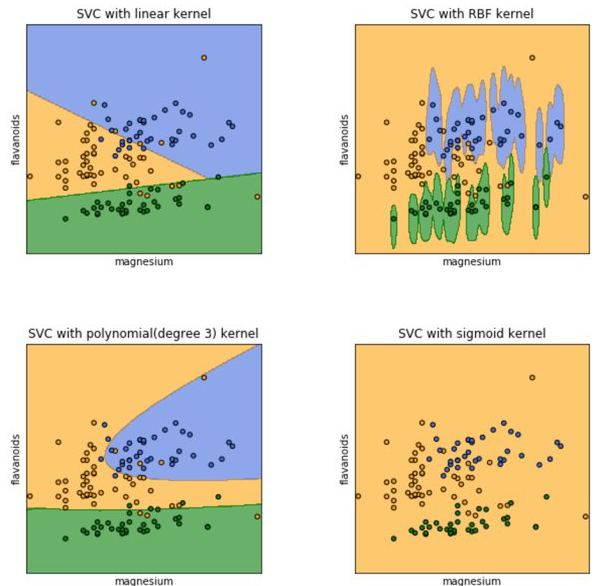

## Gamma

這是用在kernel function中的參數，主要是polynomial、radial basis(RBF)和sigmoid。

這邊有不同kernel function的優劣討論，可以事先讀一下。

Gamma的意義比較難以說明，當使用kernel function將原始資料映射到特徵空間(feature space)時，它隱含地決定了資料在特徵空間的分佈狀況。

以幾何的觀點來看，當gamma增加時，會讓Radial Basis Function(RBF)裡面的σ變小，而σ很小的高斯分佈會又高又瘦，讓只在附近的資料點有所作用。(參考)

在定義中，Gamma = How far the influence of a single training example reaches，意思是：

- gamma大，資料點的影響力範圍比較近，對超平面來說，近點的影響力權重較大，容易勾勒出擬合近點的超平面，也容易造成overfitting。

- gamma小，資料點的影響力範圍比較遠，對超平面來說，較遠的資料點也有影響力，因此能勾勒出平滑、近似直線的超平面。

gamma 正比 1/σ

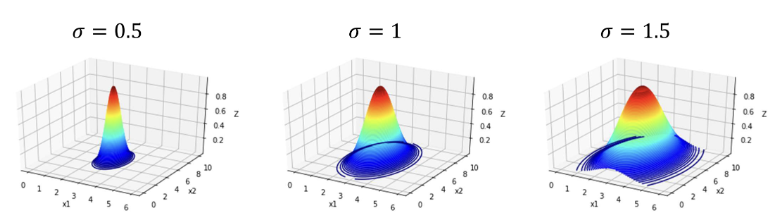
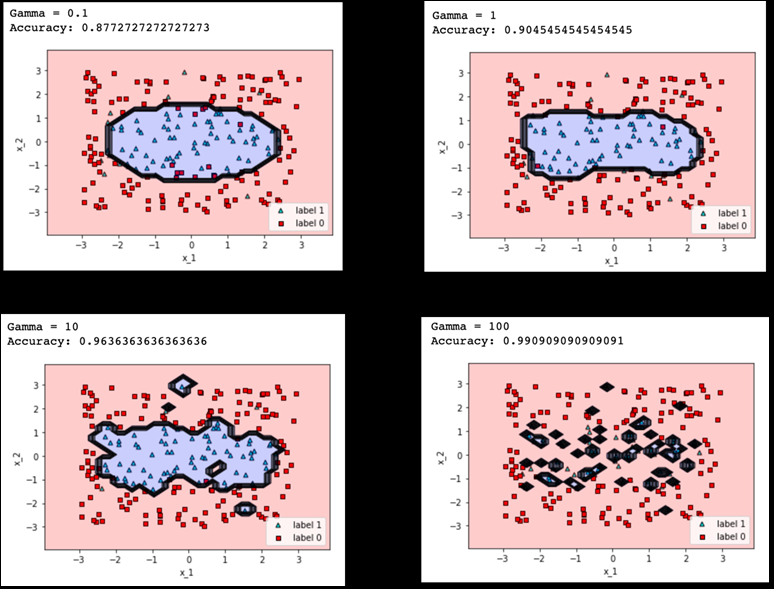

Text(0.5, 1.0, 'Original Data')

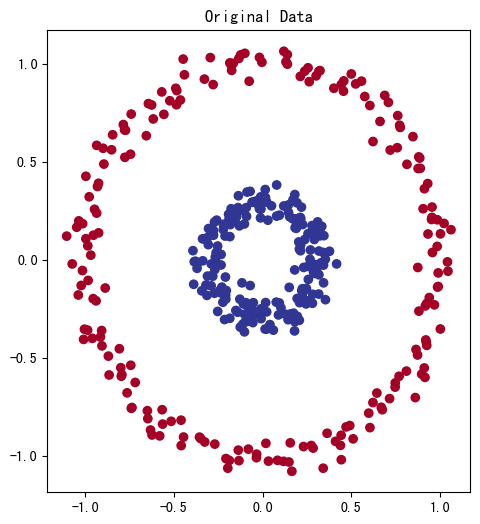

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# 建立假數據
# 生成同心圆数据
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

# 可视化原始数据
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title("Original Data")

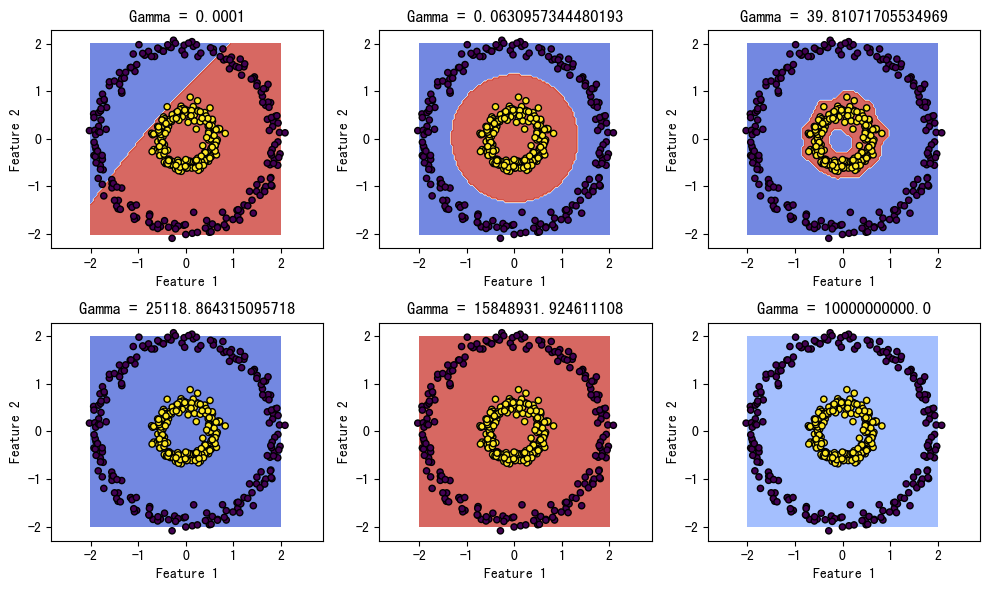

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# 生成数据
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 定義 gamma 值
gamma_values = np.logspace(-4, 10, 6).tolist()  # 創建不同 gamma 值

# 绘图设置
fig, ax = plt.subplots(2, 3, figsize=(10, 6))  # 注意：figsize 調整更適合的大小

# 繪製每個 gamma 值對應的決策邊界
for i, gamma in enumerate(gamma_values):
    # 訓練模型
    svc = SVC(kernel='rbf', gamma=gamma)
    svc.fit(X_scaled, y)

    # 建立網格
    X1, X2 = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    Z = svc.predict(np.c_[X1.ravel(), X2.ravel()])
    Z = Z.reshape(X1.shape)

    # 找到對應的子圖位置
    row = i // 3
    col = i % 3

    # 繪製決策邊界和數據點
    ax[row, col].contourf(X1, X2, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    ax[row, col].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=20, edgecolor='k')
    ax[row, col].set_title(f'Gamma = {gamma}')
    ax[row, col].set_xlabel('Feature 1')
    ax[row, col].set_ylabel('Feature 2')
    ax[row, col].axis('equal')

plt.tight_layout()
plt.show()




## 探討不同的gamma值對於SVM中support vector的影響

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


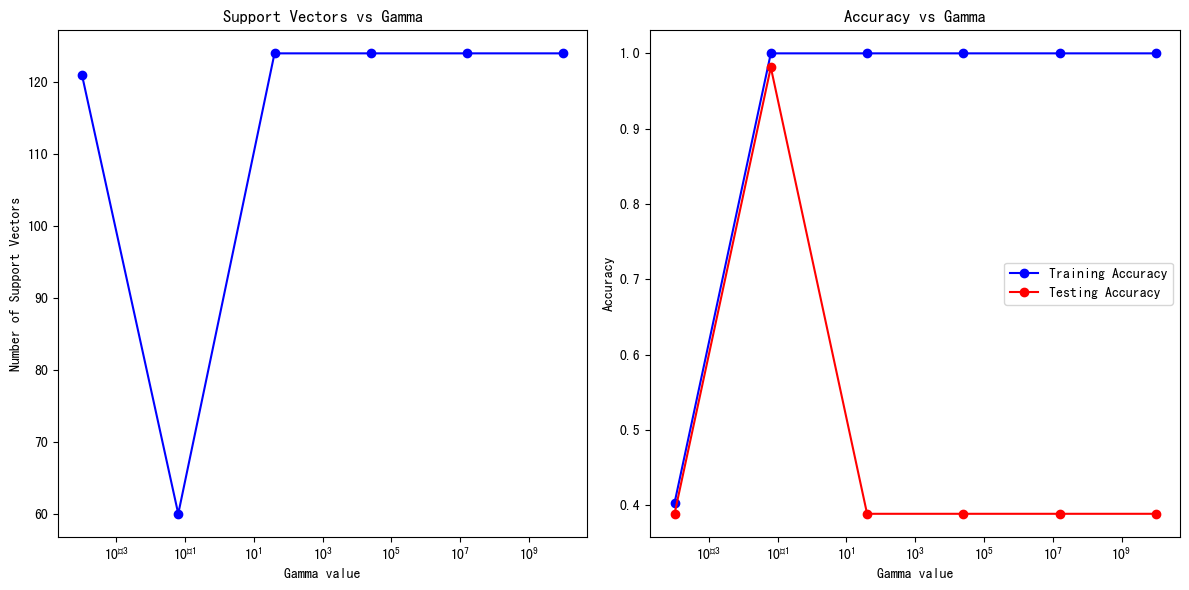

In [21]:
num_SV = []
train_accuracies = []
test_accuracies = []

# 计算不同gamma值对应的支持向量数量和准确度
for gamma in gamma_values:
    svm_model = SVC(kernel='rbf', gamma=gamma)
    svm_model.fit(X_train, y_train)
    num_SV.append(svm_model.n_support_.sum())  # 获取支持向量的总数

    # 计算训练集和测试集的准确度
    y_train_pred = svm_model.predict(X_train)
    y_test_pred = svm_model.predict(X_test)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# 绘图
plt.figure(figsize=(12, 6))

# 支持向量数量随gamma的变化
plt.subplot(1, 2, 1)
plt.semilogx(gamma_values, num_SV, marker='o', linestyle='-', color='b')
plt.xlabel('Gamma value')
plt.ylabel('Number of Support Vectors')
plt.title('Support Vectors vs Gamma')

# 准确度随gamma的变化（训练集和测试集）
plt.subplot(1, 2, 2)
plt.semilogx(gamma_values, train_accuracies, marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.semilogx(gamma_values, test_accuracies, marker='o', linestyle='-', color='r', label='Testing Accuracy')
plt.xlabel('Gamma value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Gamma')
plt.legend()

plt.tight_layout()
plt.show()